# **Default Setting**

* Python: 3.6.9
* ML Framework: tensorflow-gpu 2.4.0 / tensorflow-addons 0.12.0
* CPU: AMD Ryzen 5 5600X 6-Core Processor
* GPU: GeForce RTX 3070 (8G) (CUDA 11.1)
* RAM: 32G
* Platform: Linux Ubuntu 20.04 LTS (desktop)

Install below APIs using anaconda as belows.

```
conda create -n py36 python=3.6.9
conda acitvate py36
pip3 install tensorflow-gpu=2.4.0 tensorflow-addons=0.12.0
conda install pandas, matplotlib, pydot, jupyterlab, cudatoolkit
```

And now, you can run jupyter lab (or jupyter notebook).

```
jupyter lab
```

In [1]:
%env NOTEBOOKNAME try117
%env LOCAL_DATA_PATH data
%env CHECKPOINT_PATH ckpt
%env SUBMISSION_PATH submission

env: NOTEBOOKNAME=try117
env: LOCAL_DATA_PATH=data
env: CHECKPOINT_PATH=ckpt
env: SUBMISSION_PATH=submission


In [2]:
import tensorflow as tf
import tensorflow_addons as tfa

import datetime
import glob
import os
import platform

import numpy as np
import pandas as pd

from collections import OrderedDict
from matplotlib import pyplot as plt

print(f"tf.__version__: {tf.__version__}")
print(f"tfa.__version__: {tfa.__version__}")

tf.__version__: 2.4.0
tfa.__version__: 0.12.0


In [3]:
# If you wanna avoid below error, you need to run below codes when you start kernel.

# UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, 
# so try looking to see if a warning log message was printed above. [Op:Conv2D]

# Ref: https://blog.naver.com/vft1500/221793591386

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
# !python -V

In [5]:
# !cat /proc/cpuinfo

In [6]:
!nvidia-smi

Sun Jan  3 19:31:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 455.32.00    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Graphics Device     On   | 00000000:0A:00.0  On |                  N/A |
|  0%   43C    P2    32W / 220W |    659MiB /  7979MiB |     10%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
# !df -h

In [8]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           31Gi       6.9Gi        14Gi       615Mi        10Gi        23Gi
Swap:         2.0Gi          0B       2.0Gi


In [9]:
# platform.platform()

In [60]:
# Load the TensorBoard notebook extension.
# %load_ext tensorboard

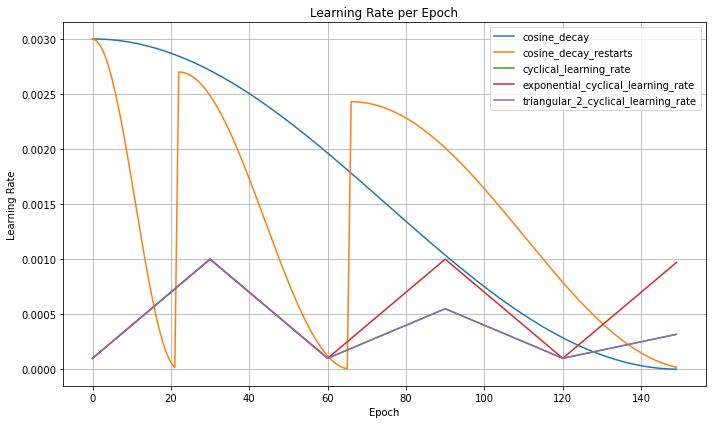

In [30]:
def trianfle_fn(x):
    return 1. / (2.**(x - 1))

learning_rate_scheduler = {
    "cosine_decay": tf.keras.experimental.CosineDecay(3e-3, 150),
    "cosine_decay_restarts": tf.keras.experimental.CosineDecayRestarts(3e-3, 150 // 7 + 1, m_mul = 0.9),
    "cyclical_learning_rate": tfa.optimizers.CyclicalLearningRate(1e-4, 1e-3, 30, trianfle_fn),
    "exponential_cyclical_learning_rate": tfa.optimizers.ExponentialCyclicalLearningRate(1e-4, 1e-3, 30),
    "triangular_2_cyclical_learning_rate": tfa.optimizers.Triangular2CyclicalLearningRate(1e-4, 1e-3, 30),
}

plt.figure(figsize = (10, 6), facecolor = "white")

for scheduler_name ,scheduler in learning_rate_scheduler.items():
    lr = [scheduler(step).numpy() for step in range(150)]
    plt.plot(lr, label = scheduler_name)
    
plt.title("Learning Rate per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()